In [1]:
#import

import pandas as pd
from IPython.display import display
from analysis_pipeline import (
    run_data_pipeline, 
    run_training_pipeline, 
    generate_comparative_visuals
)
from sentiment_model import SentimentAnalyzer

from data_crawler import crawl_reviews
from text_processor import process_reviews
from sentiment_model import SentimentAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Konfigurasi

# ID Aplikasi: Alfagift (com.alfamart.alfagift), Klik Indomaret (com.klikindomaret.app)
APPS_TO_ANALYZE = [
    {'id': 'com.alfamart.alfagift', 'name': 'Alfagift'},
    {'id': 'com.indomaret.klikindomaret', 'name': 'Klik Indomaret'}
]
TARGET_REVIEW_COUNT = 25000
TRAINING_EPOCHS = 3 
MODEL_TYPES = ['bert', 'cnn', 'lstm']

TRAIN_MODELS = True

In [3]:
# Data Processor

processed_data = {}
for app in APPS_TO_ANALYZE:
    app_id, app_name = app['id'], app['name']
    print(f"\n{'='*50}\nMemulai Proses Data untuk: {app_name}\n{'='*50}\n")
    try:
        df_raw = pd.read_csv(f"{app_id}_reviews.csv")
        print(f"File '{app_id}_reviews.csv' ditemukan, memuat data lokal.")
    except FileNotFoundError:
        df_raw = crawl_reviews(app_id=app_id, target_count=TARGET_REVIEW_COUNT)
    df_processed = process_reviews(df_raw)
    processed_data[app_name] = df_processed


Memulai Proses Data untuk: Alfagift

Memulai crawling untuk aplikasi: com.alfamart.alfagift
Terkumpul: 200 ulasan
Terkumpul: 400 ulasan
Terkumpul: 600 ulasan
Terkumpul: 800 ulasan
Terkumpul: 1000 ulasan
Terkumpul: 1200 ulasan
Terkumpul: 1400 ulasan
Terkumpul: 1600 ulasan
Terkumpul: 1800 ulasan
Terkumpul: 2000 ulasan
Terkumpul: 2200 ulasan
Terkumpul: 2400 ulasan
Terkumpul: 2600 ulasan
Terkumpul: 2800 ulasan
Terkumpul: 3000 ulasan
Terkumpul: 3200 ulasan
Terkumpul: 3400 ulasan
Terkumpul: 3600 ulasan
Terkumpul: 3800 ulasan
Terkumpul: 4000 ulasan
Terkumpul: 4200 ulasan
Terkumpul: 4400 ulasan
Terkumpul: 4600 ulasan
Terkumpul: 4800 ulasan
Terkumpul: 5000 ulasan
Terkumpul: 5200 ulasan
Terkumpul: 5400 ulasan
Terkumpul: 5600 ulasan
Terkumpul: 5800 ulasan
Terkumpul: 6000 ulasan
Terkumpul: 6200 ulasan
Terkumpul: 6400 ulasan
Terkumpul: 6600 ulasan
Terkumpul: 6800 ulasan
Terkumpul: 7000 ulasan
Terkumpul: 7200 ulasan
Terkumpul: 7400 ulasan
Terkumpul: 7600 ulasan
Terkumpul: 7800 ulasan
Terkumpul: 800

In [4]:
# Train

all_evaluation_results = {}
if TRAIN_MODELS:
    print("\nMODE: Menjalankan training ulang untuk semua model...")
    for model_type in MODEL_TYPES:
        app_results = {}
        for app_name, df in processed_data.items():
            print(f"\n{'='*60}\nTraining Model {model_type.upper()} untuk: {app_name}\n{'='*60}\n")
            analyzer = SentimentAnalyzer(model_type=model_type, batch_size=64)
            analyzer.prepare_dataloaders(df)
            analyzer.train(epochs=TRAINING_EPOCHS)
            model_save_path = f"models/{app_name.lower()}_{model_type}.pt"
            analyzer.save_model(model_save_path)
            results = analyzer.evaluate()
            app_results[app_name] = results
        all_evaluation_results[model_type] = app_results
else:
    print("\nMODE: Melewati training. Memuat model dan menjalankan evaluasi ulang...")
    for model_type in MODEL_TYPES:
        app_results = {}
        for app_name in processed_data.keys():
            print(f"\n{'='*50}\n Mengevaluasi Model: {app_name} ({model_type.upper()})\n{'='*50}")
            analyzer = SentimentAnalyzer(model_type=model_type, batch_size=64)
            model_path = f"models/{app_name.lower()}_{model_type}.pt"
            analyzer.load_model(model_path)
            analyzer.prepare_dataloaders(processed_data[app_name])
            results = analyzer.evaluate()
            app_results[app_name] = results
        all_evaluation_results[model_type] = app_results

print("\nProses training/evaluasi selesai.")


MODE: Menjalankan training ulang untuk semua model...

Training Model BERT untuk: Alfagift

Model akan menggunakan device: cuda:0 | Arsitektur: BERT


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DataLoaders siap (Train: 20000, Test: 5000).
Memulai training untuk 3 epoch...
Epoch 1/3 | Training Loss: 0.0975 | Validation Loss: 0.0809
Epoch 2/3 | Training Loss: 0.0631 | Validation Loss: 0.0850
Epoch 3/3 | Training Loss: 0.0458 | Validation Loss: 0.1027
Training selesai.
Model berhasil disimpan di: models/alfagift_bert.pt

--- Hasil Evaluasi --- 
Akurasi: 0.9674 | F1-Score (Macro): 0.9346


Training Model BERT untuk: Klik Indomaret

Model akan menggunakan device: cuda:0 | Arsitektur: BERT


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DataLoaders siap (Train: 20000, Test: 5000).
Memulai training untuk 3 epoch...
Epoch 1/3 | Training Loss: 0.1954 | Validation Loss: 0.1716
Epoch 2/3 | Training Loss: 0.1364 | Validation Loss: 0.1670
Epoch 3/3 | Training Loss: 0.1002 | Validation Loss: 0.1879
Training selesai.
Model berhasil disimpan di: models/klik indomaret_bert.pt

--- Hasil Evaluasi --- 
Akurasi: 0.9398 | F1-Score (Macro): 0.9396


Training Model CNN untuk: Alfagift

Model akan menggunakan device: cuda:0 | Arsitektur: CNN
DataLoaders siap (Train: 20000, Test: 5000).
Memulai training untuk 3 epoch...
Epoch 1/3 | Training Loss: 0.1974 | Validation Loss: 0.1110
Epoch 2/3 | Training Loss: 0.1176 | Validation Loss: 0.1001
Epoch 3/3 | Training Loss: 0.1056 | Validation Loss: 0.0929
Training selesai.
Model berhasil disimpan di: models/alfagift_cnn.pt

--- Hasil Evaluasi --- 
Akurasi: 0.9658 | F1-Score (Macro): 0.9367


Training Model CNN untuk: Klik Indomaret

Model akan menggunakan device: cuda:0 | Arsitektur: CNN
DataLoa


Membuat Visualisasi Komparatif



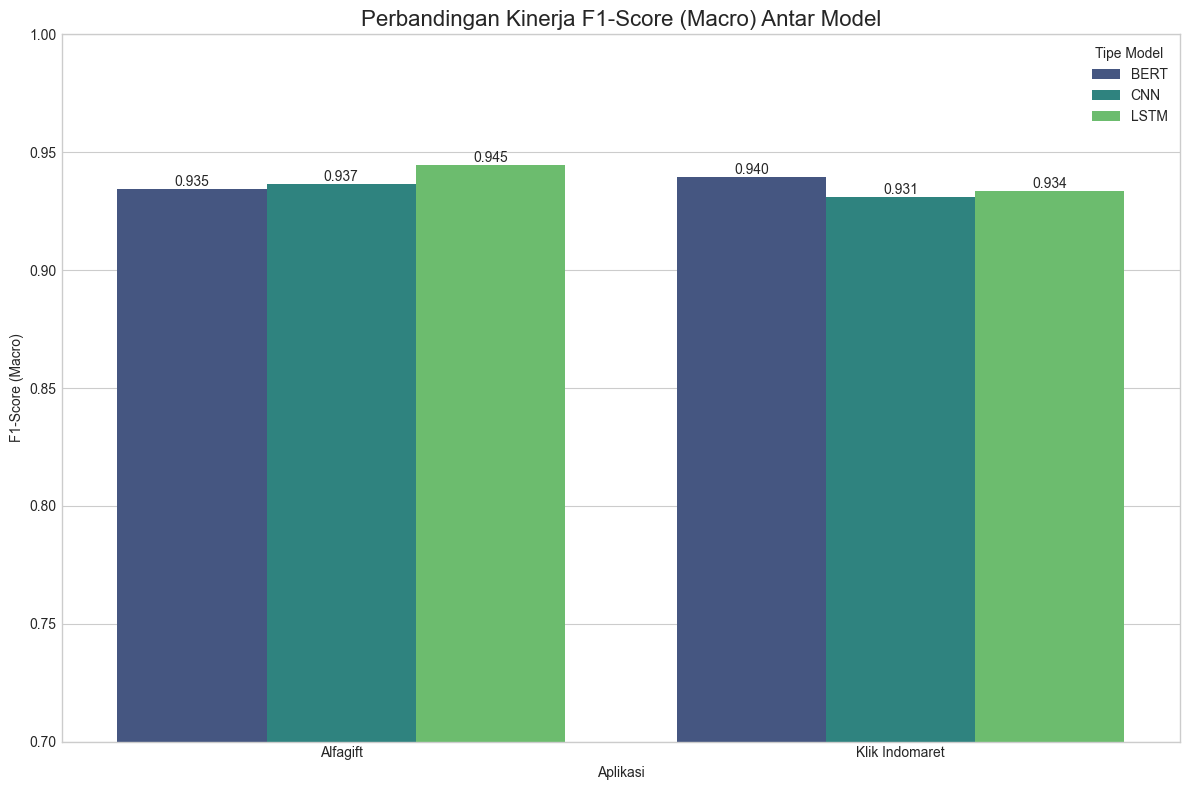

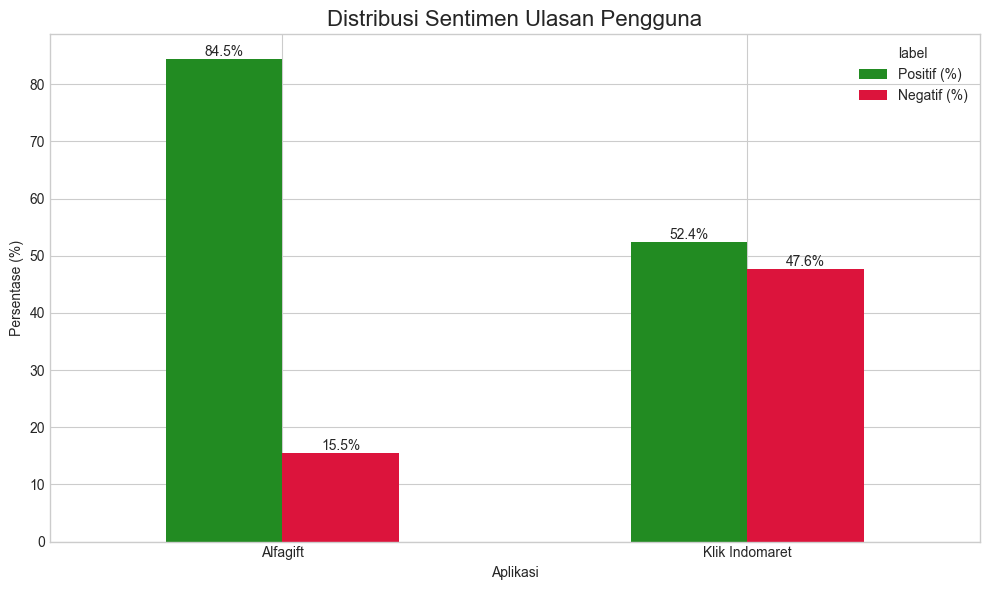


Visualisasi Confusion Matrix per Eksperimen



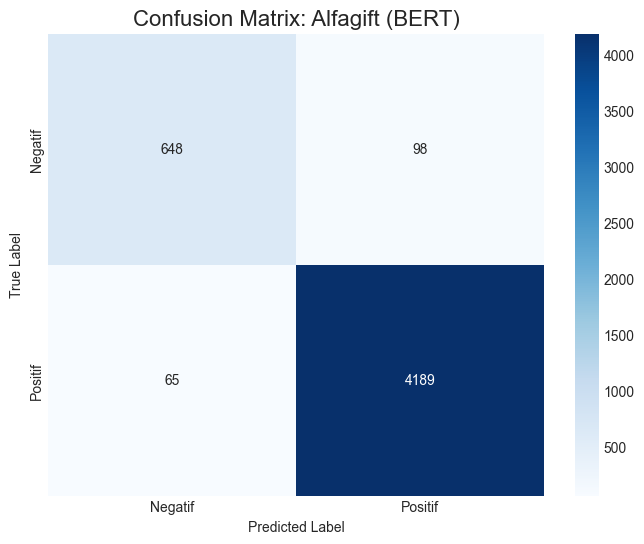

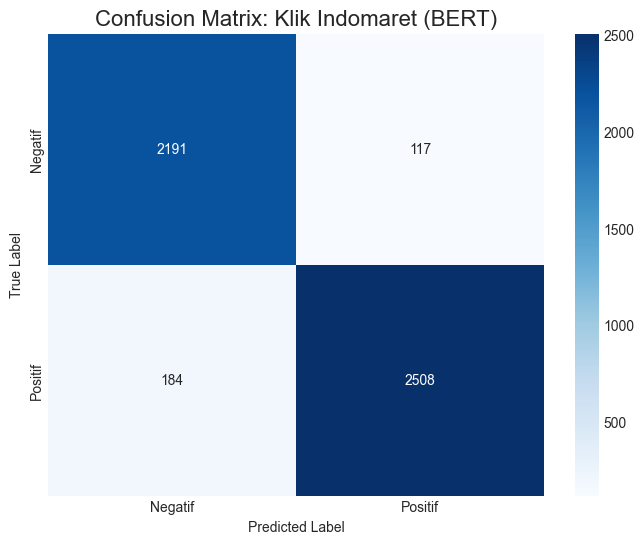

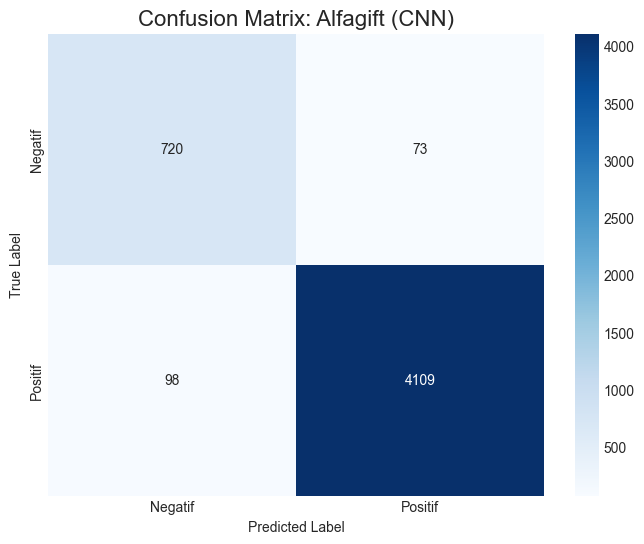

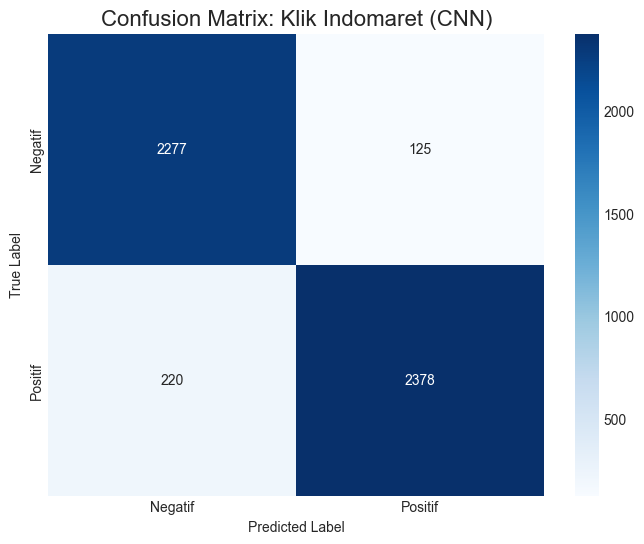

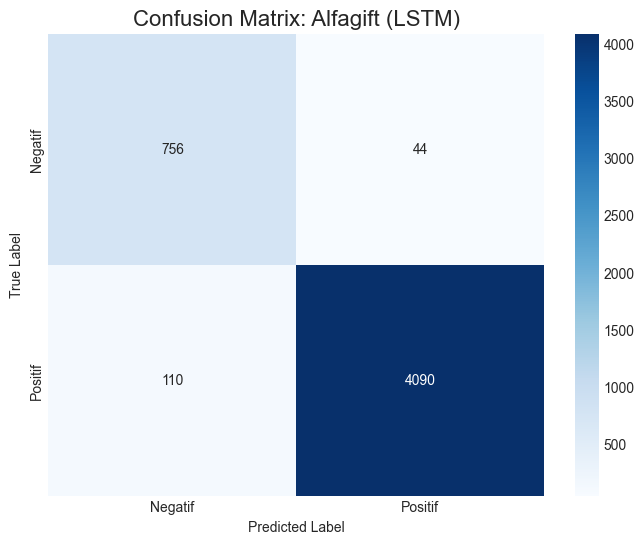

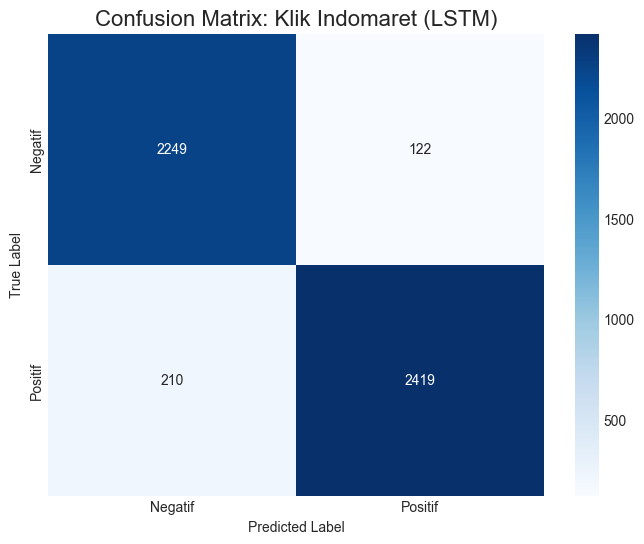


Tabel Hasil Eksperimen Komparatif



,Aplikasi,Model,Akurasi,F1-Score (Macro),Presisi (Macro),Recall (Macro)
0,Alfagift,BERT,0.967,0.935,0.943,0.927
1,Klik Indomaret,BERT,0.940,0.940,0.939,0.940
2,Alfagift,CNN,0.966,0.937,0.931,0.942
3,Klik Indomaret,CNN,0.931,0.931,0.931,0.932
4,Alfagift,LSTM,0.969,0.945,0.931,0.959
5,Klik Indomaret,LSTM,0.934,0.934,0.933,0.934


In [5]:
# Visualisasi

print(f"\n{'='*60}\nMembuat Visualisasi Komparatif\n{'='*60}\n")
plt.style.use('seaborn-v0_8-whitegrid')

# A. Visualisasi Perbandingan Kinerja F1-Score
results_list = []
for model_type, app_results in all_evaluation_results.items():
    for app_name, metrics in app_results.items():
        if metrics:
            res = {'Aplikasi': app_name, 'Model': model_type.upper(), 'F1-Score (Macro)': metrics.get('f1_macro', 0)}
            results_list.append(res)
df_results = pd.DataFrame(results_list)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_results, x='Aplikasi', y='F1-Score (Macro)', hue='Model', palette='viridis')
ax.set_title('Perbandingan Kinerja F1-Score (Macro) Antar Model', fontsize=16)
ax.set_xlabel('Aplikasi'); ax.set_ylabel('F1-Score (Macro)'); ax.set_ylim(0.7, 1.0)
for container in ax.containers: ax.bar_label(container, fmt='%.3f')
plt.legend(title='Tipe Model'); plt.tight_layout(); plt.savefig('model_performance_comparison.png', dpi=300); plt.show()

# B. Visualisasi Distribusi Sentimen
sentiment_counts = {app_name: df['label'].value_counts(normalize=True) * 100 for app_name, df in processed_data.items()}
df_sentiment = pd.DataFrame(sentiment_counts).T.fillna(0).rename(columns={1: 'Positif (%)', 0: 'Negatif (%)'})
ax1 = df_sentiment.plot(kind='bar', figsize=(10, 6), rot=0, color={'Positif (%)': 'forestgreen', 'Negatif (%)': 'crimson'})
ax1.set_title('Distribusi Sentimen Ulasan Pengguna', fontsize=16)
ax1.set_xlabel('Aplikasi'); ax1.set_ylabel('Persentase (%)')
for container in ax1.containers: ax1.bar_label(container, fmt='%.1f%%')
plt.tight_layout(); plt.savefig('sentiment_distribution.png', dpi=300); plt.show()
    
# C. Visualisasi Confusion Matrix
print(f"\n{'='*60}\nVisualisasi Confusion Matrix per Eksperimen\n{'='*60}\n")
for model_type, app_results in all_evaluation_results.items():
    for app_name, metrics in app_results.items():
        if metrics and 'confusion_matrix' in metrics:
            cm = metrics['confusion_matrix']
            title = f'Confusion Matrix: {app_name} ({model_type.upper()})'
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
            plt.title(title, fontsize=16); plt.xlabel('Predicted Label'); plt.ylabel('True Label')
            safe_title = "".join(c for c in title if c.isalnum() or c in (' ', '_')).rstrip().replace(" ", "_")
            plt.savefig(f'cm_{safe_title}.png', dpi=300, bbox_inches='tight')
            plt.show()

# D. Membuat Tabel Hasil Akhir
final_results_list = []
for model_type, app_results in all_evaluation_results.items():
    for app_name, metrics in app_results.items():
        if metrics:
            res = {'Aplikasi': app_name, 'Model': model_type.upper(), 'Akurasi': metrics.get('accuracy', 0),
                   'F1-Score (Macro)': metrics.get('f1_macro', 0), 'Presisi (Macro)': metrics.get('precision_macro', 0),
                   'Recall (Macro)': metrics.get('recall_macro', 0)}
            final_results_list.append(res)
df_final_results = pd.DataFrame(final_results_list)
numeric_columns = ['Akurasi', 'F1-Score (Macro)', 'Presisi (Macro)', 'Recall (Macro)']
styled_df = df_final_results.style.format("{:.3f}", subset=numeric_columns).background_gradient(cmap='viridis', subset=numeric_columns)

print(f"\n{'='*60}\n\033[1mTabel Hasil Eksperimen Komparatif\033[0m\n{'='*60}\n")
display(styled_df)